In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import statistics
import numpy as np

In [2]:
data = pd.read_csv('anime_cleaned.csv')

In [3]:
data.head()

,name,description,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
0,Dark Gathering,"Keitarou, chàng trai có khả năng thu hút ma qu...",0.95,25 tập,36088,Phim đang chiếu,"['Shounen', 'Supernatural', 'Horror']",Hiroshi Ikehata,Nhật Bản,34,HD,R - 17+ (bạo lực và tục tĩu),OLM,Mùa Hạ,2023.0,Anime bộ
1,Trò Chơi Nói Dối,"Đảo học viện, nơi các học sinh mở ra những trậ...",0.94,12 tập,173964,Phim đang chiếu,"['Sci-Fi', 'School', 'Romance', 'Psychological...",Oono Satoru,Nhật Bản,222,HD,PG-13 - Teens 13 tuổi trở lên,GEEK TOYS,Mùa Hạ,2023.0,Anime bộ
2,Horimiya: Piece,Chuyển thể những phần ở manga bị cắt trong TV ...,0.91,13 tập,584019,Phim đang chiếu,"['Shounen', 'School', 'Romance', 'Slice of Lif...",Ishihama Masashi,Nhật Bản,497,HD,PG-13 - Teens 13 tuổi trở lên,CloverWorks,Mùa Hạ,2023.0,Anime bộ
3,Temple,Đúng vậy. Tôi sẽ trở thành một nhà sư! Không b...,0.97,12 tập,86385,Phim đang chiếu,"['Romance', 'Slice of Life', 'Harem', 'Ecchi',...",Koga Kazuomi,Nhật Bản,139,HD,PG-13 - Teens 13 tuổi trở lên,Gekkou,Mùa Hạ,2023.0,Anime bộ
4,Tôi Có Thực Sự Là Người Mạnh Nhất Không?,Một thanh niên bị bắt nạt được tái sinh ở thế ...,0.89,12 tập,555460,Phim đang chiếu,"['Shounen', 'Romance', 'Fantasy', 'Comedy', 'A...",Naoya Takashi,Nhật Bản,643,HD,PG-13 - Teens 13 tuổi trở lên,Staple Entertainment,Mùa Hạ,2023.0,Anime bộ


In [4]:
data = data.drop('description', axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      4860 non-null   object 
 1   voting    4860 non-null   float64
 2   duration  4860 non-null   object 
 3   view      4860 non-null   int64  
 4   status    4860 non-null   object 
 5   genre     4860 non-null   object 
 6   director  4860 non-null   object 
 7   country   4860 non-null   object 
 8   follower  4860 non-null   int64  
 9   quality   4860 non-null   object 
 10  rating    4860 non-null   object 
 11  studio    4860 non-null   object 
 12  season    4554 non-null   object 
 13  year      4550 non-null   float64
 14  type      4860 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 569.7+ KB


In [6]:
data.isnull().sum()*100/len(data)

name        0.000000
voting      0.000000
duration    0.000000
view        0.000000
status      0.000000
genre       0.000000
director    0.000000
country     0.000000
follower    0.000000
quality     0.000000
rating      0.000000
studio      0.000000
season      6.296296
year        6.378601
type        0.000000
dtype: float64

Since the null values account for only 6% of the total data, they can be removed.

In [7]:
data = data.dropna(subset=['year', 'season'])

In [8]:
data['year'] = data['year'].astype(int)

<ipython-input-8-081239f5ad11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


As an anime enthusiast, i'm quite curious about the following questions and would like to explore the crawled data to answer them.

<b> Objectives: </b>
1. Exploring trend in anime genre.
2. Finding patterns in numerical features (voting, view, follower, year) of the dataset.
3. Find out the duration distribution of anime in different type.
4. Exploring categorical data.
5. Exploring the number of anime through years.

#1. Exploring trend in anime genre

In [9]:
type(data['genre'][0])

str

Genre values should be list, not string. Therefore, i'll make some changes to convert them into the appropriate data type.

In [10]:
for index, row in data.iterrows():
    temp = data['genre'][index].replace('[','').replace(']','').replace('\'','').split(',')
    #print(temp)
    for i in range(len(temp)):
        temp[i] = temp[i].strip()
        #print(temp[i])

    data['genre'][index] = temp

<ipython-input-10-47bd43b4ec5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'][index] = temp


In [11]:
type(data['genre'][0])

list

In [12]:
data['genre']

0                         [Shounen, Supernatural, Horror]
1       [Sci-Fi, School, Romance, Psychological, Game,...
2       [Shounen, School, Romance, Slice of Life, Comedy]
3          [Romance, Slice of Life, Harem, Ecchi, Comedy]
4          [Shounen, Romance, Fantasy, Comedy, Adventure]
                              ...                        
4855                     [Shoujo, Fantasy, Magic, Action]
4856                                [Live Action, Action]
4857                                            [Cartoon]
4858               [Supernatural, Fantasy, Magic, Action]
4859                 [Phim chiếu rạp, Fantasy, Adventure]
Name: genre, Length: 4550, dtype: object

Firstly, I'd like to see the top 10 anime genres that are streamed the most.

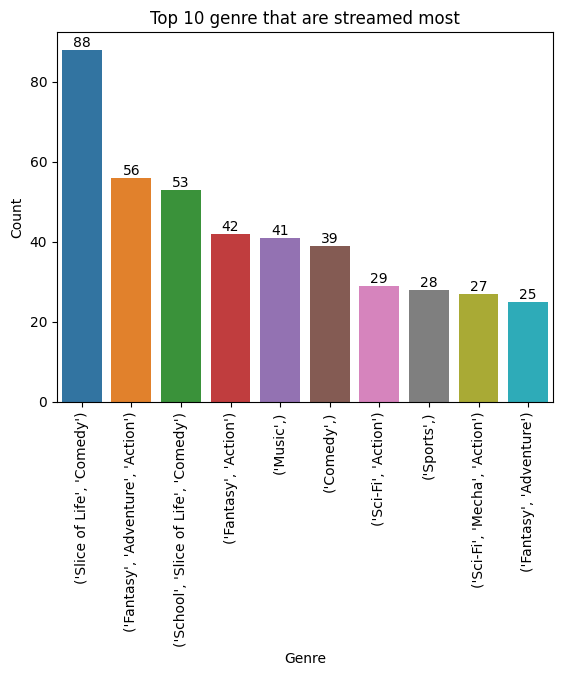

In [13]:
data['genre'] = data['genre'].apply(tuple)

top_10_genre = data['genre'].value_counts().head(10)

sns.barplot(x=top_10_genre.index, y=top_10_genre.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 genre that are streamed most')
plt.xticks(rotation=90)

for i, value in enumerate(top_10_genre.values):
    plt.annotate(value, (i, value), ha='center', va='bottom')

plt.show()

How about individual genres? i'll visuallize the top 10 genres individually.

In [14]:
genre_distinct = []

for item in data['genre']:
    for i in range(len(item)):
        genre_distinct.append(item[i])

In [15]:
c = Counter(genre_distinct)

genre_distinct_df = pd.DataFrame.from_dict(c, orient='index', columns=['Count'])

top_10_genre_distinct = genre_distinct_df.sort_values(by='Count', ascending=False).head(10)
top_10_genre_distinct = top_10_genre_distinct.reset_index().rename(columns={'index':'Genre'})

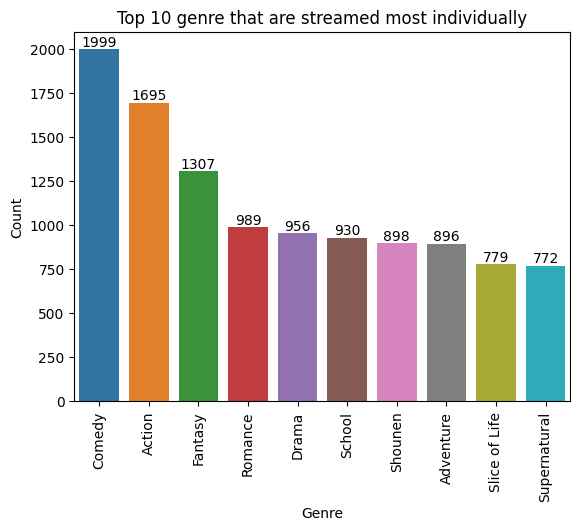

In [16]:
sns.barplot(data=top_10_genre_distinct, x='Genre', y='Count')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 genre that are streamed most individually')
plt.xticks(rotation=90)

for i, value in enumerate(top_10_genre_distinct['Count']):
    plt.annotate(value, (i, value), ha='center', va='bottom')

plt.show()

From the first bar chart, we can see that school, slice of life and comedy are often combined with each other. Similarly, fantasy, action and adventure also tend to be paired together.

In the second chart, it's evident that comedy, action and fantasty are the top 3 genres that are streamed most. This is quite understandable. Comedy easily appeals to all age groups and is a highly entertaining genre. Both fantasy and action are captivating genres that can engage viewers for the long term, which is why they attract a substantial streaming audience. <br>
If I were to plot only the initial chart, I wouldn't be able to identify any genres related to romance, drama or shounen. However, when plotted separately for each genre, they do appear.

#2. Finding patterns in numerical features


<Figure size 640x480 with 0 Axes>

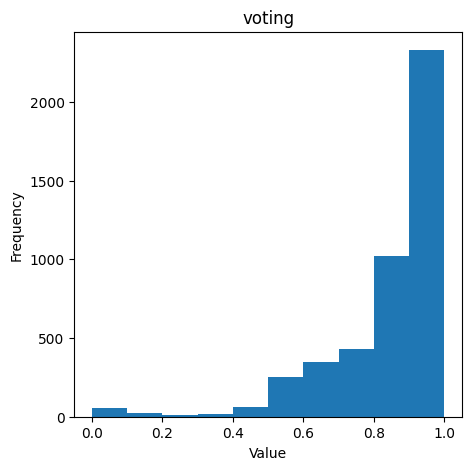

<Figure size 640x480 with 0 Axes>

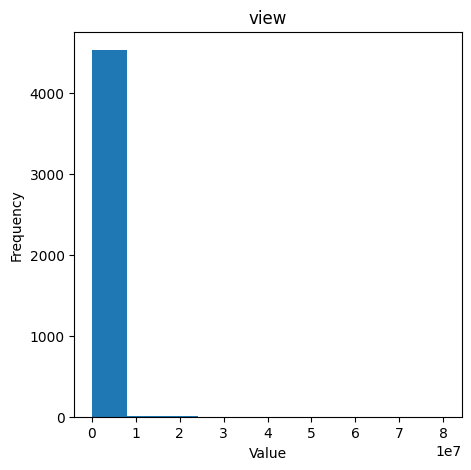

<Figure size 640x480 with 0 Axes>

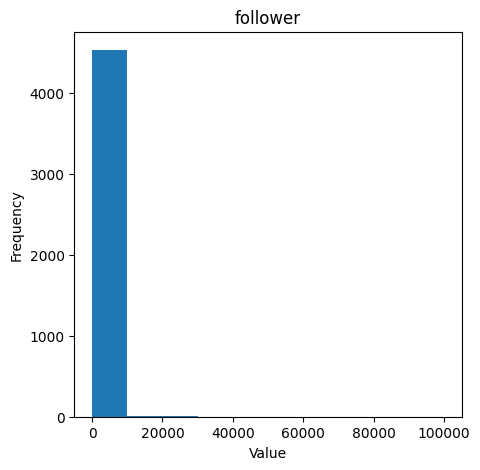

<Figure size 640x480 with 0 Axes>

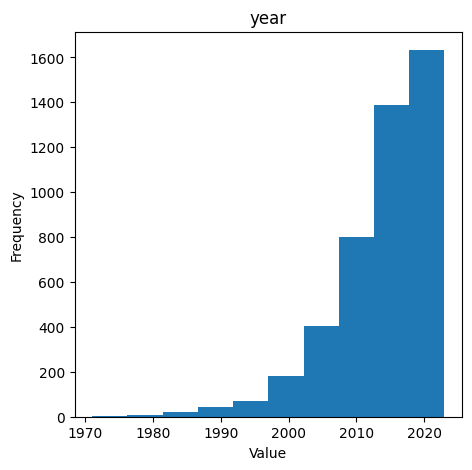

In [17]:
numerical_features = data.select_dtypes(include='number').columns

for feature in numerical_features:
    plt.figure()
    plt.figure(figsize=(5,5))
    data[feature].plot.hist()
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

<Figure size 640x480 with 0 Axes>

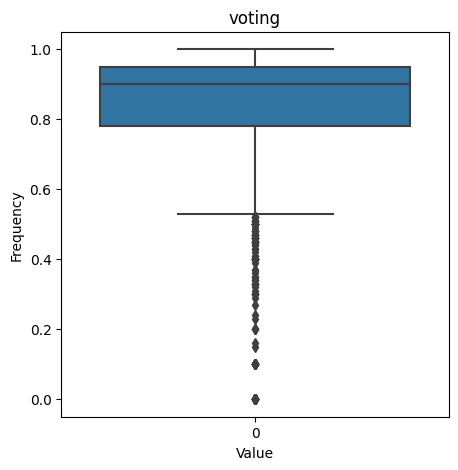

<Figure size 640x480 with 0 Axes>

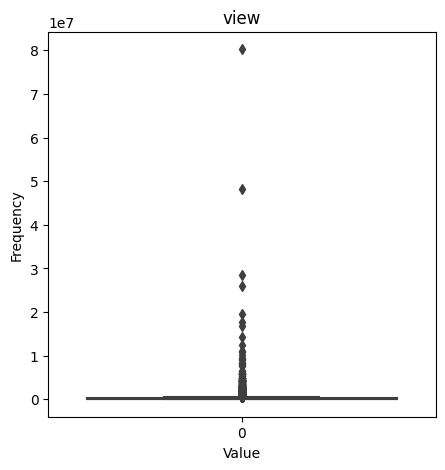

<Figure size 640x480 with 0 Axes>

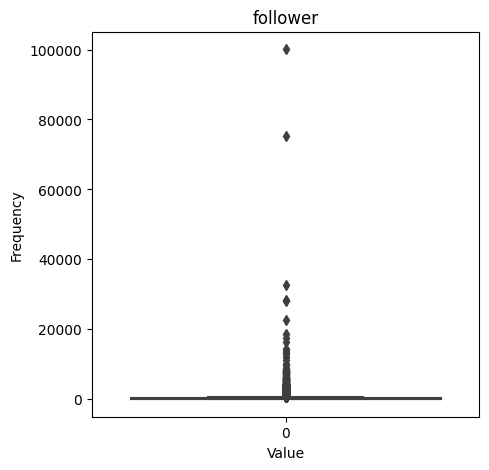

<Figure size 640x480 with 0 Axes>

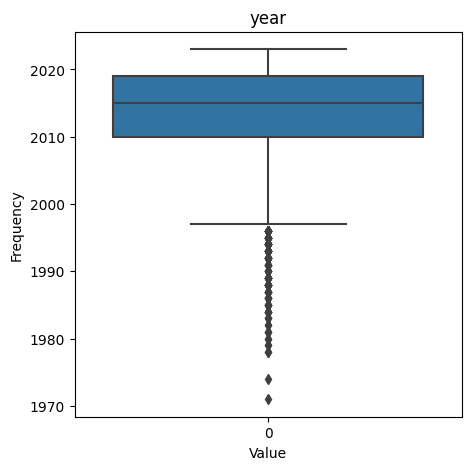

In [18]:
numerical_features = data.select_dtypes(include='number').columns

for feature in numerical_features:
    plt.figure()
    plt.figure(figsize=(5,5))
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Firstly, i have a few observations:
- The distribution of voting and year are left-skew.
- Follower and view have some extreme values that result in such unusual histogram distributions.

<ipython-input-19-5f3d477cd391>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


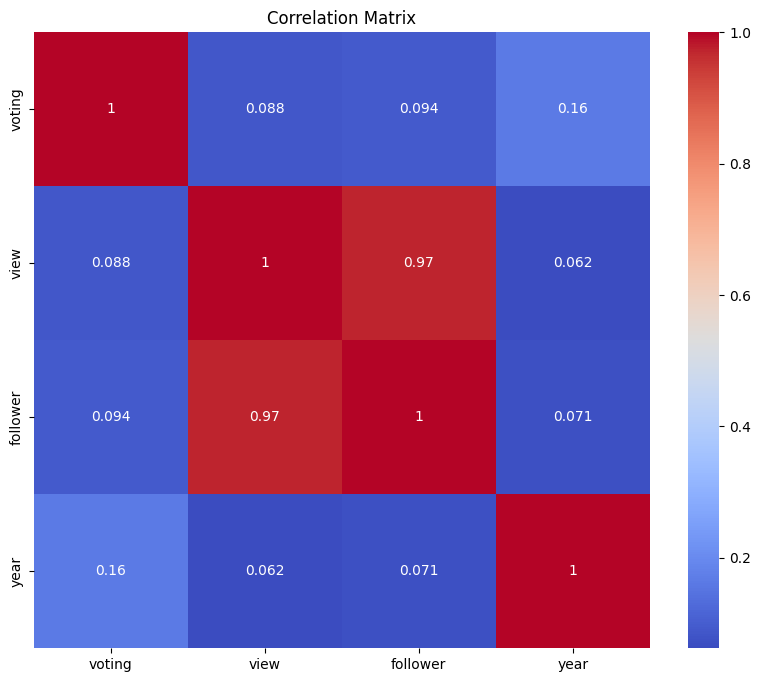

In [19]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.show()

Furthermore, there is no linear relationship between the numerical attributes except for view and follower (r=0.97). This is quite different from my initial thoughts.

In [20]:
def show_summary(feature):
    print(f'Mean: ', statistics.mean(feature))
    print(f'Median: ', statistics.median(feature))
    print(f'Mode: ', statistics.mode(feature))
    print(f'Standard deviation: ', statistics.stdev(feature))
    print(f'Quartile range: Q1:', np.percentile(feature, 25), f'   Q2:', np.percentile(feature, 50),
    f'   Q3:', np.percentile(feature, 75))

In [21]:
show_summary(data['voting'])

Mean:  0.8400989010989011
Median:  0.9
Mode:  1.0
Standard deviation:  0.17477143664180325
Quartile range: Q1: 0.78    Q2: 0.9    Q3: 0.95


We can notice that the voting is relatively high, even very high. 25% of the data is greater than 0.78 and 1 is the most frequent value for voting. Data doesn't disper too much, mainly concentrate around center. <br>
The question here is that: **Why the voting rate is so high on this anime streaming platform?**  

First of all, the voting mechanism of this website is relatively simple. Everyone who has an account (by signing up or using facebook/gmail account) can contribute to the total voting rate of every anime on this website. Voting rate is ranging from 1 to 10, by stars. <br>

Since I lack information about the user data, I am temporarily unable to provide the most accurate explanation for the underlying reasons. Below are some of my assumptions: <br>

1. This website displays the current voting ratio of anime on the rating bar. This influences the users to some extent as they are affected by the current rating value.
2. The popular anime genres are streamed most on this platform. As a result, the majority of the films align well with the viewers' preferences.

In [22]:
show_summary(data['follower'])

Mean:  500.02505494505493
Median:  53.0
Mode:  0
Standard deviation:  2344.772965011924
Quartile range: Q1: 13.0    Q2: 53.0    Q3: 276.0


In [23]:
show_summary(data['view'])

Mean:  380297.1498901099
Median:  64050.5
Mode:  31026
Standard deviation:  1776779.681941226
Quartile range: Q1: 25708.75    Q2: 64050.5    Q3: 232236.75


It can be observed that the view and follower variable has extreme values, affecting the mean and standard deviation. In this case, the median serves as a good measure of central tendency and quartile range is the same for dispersion. <br>

We'll see some extreme values or ouliers in these features. <br>
Using IQR, outliers are values which are greater than Q3+1.5IQR or lower than Q1-1.5IQR

In [24]:
def show_outliers(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)

    IQR = Q3-Q1

    upper_range = Q3 + 1.5*IQR
    return upper_range

In [25]:
print(f'view\'s upper range: ', show_outliers(data['view']))
print(f'follower\'s upper range: ', show_outliers(data['follower']))

view's upper range:  542028.75
follower's upper range:  670.5


In [26]:
data[data['view'] > show_outliers(data['view'])].sort_values(by = 'view', ascending=False)

,name,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
8,One Piece - Đảo Hải Tặc,0.91,chưa rõ,80263136,Phim đang chiếu,"(Shounen, Super Power, Fantasy, Drama, Comedy,...",Uda Kounosuke,Nhật Bản,100095,FHD,PG-13 - Teens 13 tuổi trở lên,Toei Animation,Mùa Thu,1999,Anime bộ
2840,Black Clover (TV),0.95,170 tập,48299209,Trọn bộ,"(Shounen, Fantasy, Comedy, Magic, Action)",Yoshihara Tatsuya,Nhật Bản,75328,HD,PG-13 - Teens 13 tuổi trở lên,Studio Pierrot,Mùa Thu,2017,Anime bộ
3538,Thám Tử Lừng Danh Conan,0.94,chưa rõ,28497423,Phim đang chiếu,"(Shounen, Police, Comedy, Adventure, Mystery)",Kodama Kenji,Nhật Bản,32651,HD,PG-13 - Teens 13 tuổi trở lên,TMS Entertainment,Mùa Đông,1996,Anime bộ
3054,Thanh Gươm Diệt Quỷ: Làng Thợ Rèn,0.95,11 tập,25859882,Trọn bộ,"(Shounen, Supernatural, Demons, Historical, Ac...",Sotozaki Haruo,Nhật Bản,17433,HD,R - 17+ (bạo lực và tục tĩu),ufotable,Mùa Xuân,2023,Anime bộ
3047,Đấu La Đại Lục,0.91,263 tập,19548097,Phim đang chiếu,"(Fantasy, Adventure, Action)",Đang cập nhật,Trung Quốc,22540,HD,PG-13 - Teens 13 tuổi trở lên,Sparkly Key Animation Studio,Mùa Đông,2018,Anime bộ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,Toàn Chức Cao Thủ (2018),0.90,03 tập,547882,Trọn bộ,"(Game, Action)",Đang cập nhật,Trung Quốc,455,HD,PG-13 - Teens 13 tuổi trở lên,Đang cập nhật,Mùa Xuân,2018,Anime bộ
2896,Yuragi-sou no Yuuna-san OVA,0.95,04 tập,547418,Phim đang chiếu,"(Shounen, Romance, Supernatural, Harem, Ecchi,...",Đang cập nhật,Nhật Bản,775,HD,Đang cập nhật,Đang cập nhật,Mùa Hạ,2018,Anime bộ
3843,Sword Art Online Movie: Ordinal Scale,0.96,119 phút,545592,Trọn bộ,"(Phim chiếu rạp, Romance, Game, Fantasy, Adven...",Đang cập nhật,Nhật Bản,763,BD,PG-13 - Teens 13 tuổi trở lên,A-1 Pictures,Mùa Đông,2017,Anime lẻ
926,Inazuma Eleven Go,0.95,47 tập,544137,Trọn bộ,"(Shounen, Super Power, Sports)",Akiyama Katsuhito,Nhật Bản,808,HD,G - Mọi lứa tuổi,OLM,Mùa Xuân,2011,Anime bộ


Based on a few records above, i formulated some assumptions about anime with really high view counts:
1. Based on released year, they are:
- Anime series have been in production for a long time and still releasing new episodes.
- Anime series which is hot recent years.
2. Based on anime type:
- Most of them are TV anime series, and for OVA/movie anime, they are all adaptations of popular anime series.


In [27]:
data[data['follower'] > show_outliers(data['follower'])].sort_values(by = 'follower', ascending=False)

,name,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
8,One Piece - Đảo Hải Tặc,0.91,chưa rõ,80263136,Phim đang chiếu,"(Shounen, Super Power, Fantasy, Drama, Comedy,...",Uda Kounosuke,Nhật Bản,100095,FHD,PG-13 - Teens 13 tuổi trở lên,Toei Animation,Mùa Thu,1999,Anime bộ
2840,Black Clover (TV),0.95,170 tập,48299209,Trọn bộ,"(Shounen, Fantasy, Comedy, Magic, Action)",Yoshihara Tatsuya,Nhật Bản,75328,HD,PG-13 - Teens 13 tuổi trở lên,Studio Pierrot,Mùa Thu,2017,Anime bộ
3538,Thám Tử Lừng Danh Conan,0.94,chưa rõ,28497423,Phim đang chiếu,"(Shounen, Police, Comedy, Adventure, Mystery)",Kodama Kenji,Nhật Bản,32651,HD,PG-13 - Teens 13 tuổi trở lên,TMS Entertainment,Mùa Đông,1996,Anime bộ
3096,Ta Muốn Trở Thành Chúa Tể Bóng Tối!,0.96,20 tập,16724826,Trọn bộ,"(Fantasy, Comedy, Action)",Nakanishi Kazuya,Nhật Bản,28508,HD,R - 17+ (bạo lực và tục tĩu),Nexus,Mùa Thu,2022,Anime bộ
3031,Bleach,0.92,366 tập,17643562,Trọn bộ,"(Shounen, Supernatural, Super Power, Fantasy, ...",Abe Noriyuki,Nhật Bản,28114,HD,PG-13 - Teens 13 tuổi trở lên,Studio Pierrot,Mùa Thu,2004,Anime bộ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Blend S,0.97,12 tập,434664,Trọn bộ,"(Slice of Life, Comedy)",Masuyama Ryouji,Nhật Bản,685,HD,PG-13 - Teens 13 tuổi trở lên,A-1 Pictures,Mùa Thu,2017,Anime bộ
893,JoJo no Kimyou na Bouken: Stardust Crusaders 2...,0.93,24 tập,487917,Trọn bộ,"(Shounen, Supernatural, Drama, Adventure, Action)",Tsuda Naokatsu,Nhật Bản,683,HD,R - 17+ (bạo lực và tục tĩu),David Production,Mùa Đông,2015,Anime bộ
3557,Tinh Thần Biến Phần 5,0.93,chưa rõ,722904,Phim đang chiếu,"(Cartoon,)",Đang cập nhật,Trung Quốc,682,HD,PG-13 - Teens 13 tuổi trở lên,Foch Films,Mùa Xuân,2022,Anime bộ
3365,Cách Sống Của Thiếu Nữ Hành Quyết,0.69,12 tập,371996,Trọn bộ,"(Fantasy, Adventure, Action)",Kawasaki Yoshiki,Nhật Bản,677,HD,PG-13 - Teens 13 tuổi trở lên,J.C.Staff,Mùa Xuân,2022,Anime bộ


The reason for extreme high follower is the same as view.

Besides, view also have positive linear correlation with follower as we have seen from correlation matrix.

<Axes: xlabel='view', ylabel='follower'>

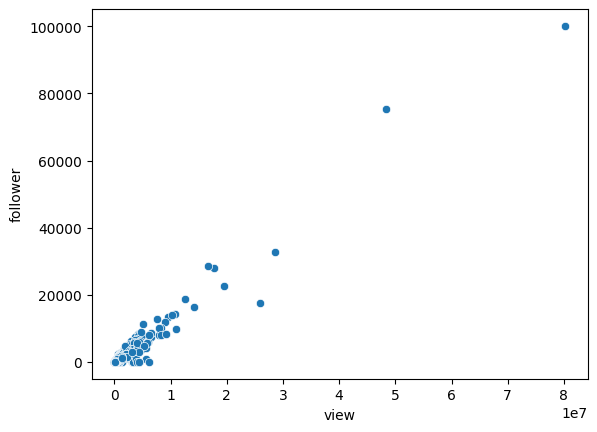

In [28]:
sns.scatterplot(data=data, x='view', y='follower')

The distribution of years is quite understandable. The advancing manufacturing technology has led to an increasing number of anime being aired compared to the past.

# 3. Find out the duration distribution of anime in different type.

Since there're two type of anime here (series and movie/ova), i'll analyze them seperately as duration format of each type is different from each other. Duration of anime series are caculated by the number of episode. Meanwhile anime movie/ova have duration caculated by both time (minutes) and episode.

### 3.1 Anime series

In [ ]:
pd.set_option('display.max_rows', None)
data[data['type'] == 'Anime bộ']['duration'].value_counts()

12 tập     1344
13 tập      473
chưa rõ     176
24 tập      175
26 tập      174
25 tập      113
2 tập        97
11 tập       84
10 tập       80
6 tập        72
3 tập        69
4 tập        67
1 tập        51
8 tập        34
51 tập       30
50 tập       27
52 tập       26
16 tập       25
5 tập        24
22 tập       23
20 tập       21
14 tập       21
7 tập        20
9 tập        18
23 tập       16
15 tập       15
39 tập       13
60 tập        9
49 tập        9
48 tập        8
21 tập        7
40 tập        6
43 tập        6
18 tập        5
38 tập        5
45 tập        5
17 tập        4
75 tập        4
47 tập        4
27 tập        4
34 tập        3
104 tập       3
30 tập        3
64 tập        3
37 tập        3
92 tập        3
35 tập        3
97 tập        3
70 tập        2
33 tập        2
36 tập        2
78 tập        2
153 tập       2
63 tập        2
112 tập       2
54 tập        2
148 tập       2
146 tập       2
73 tập        2
178 tập       2
65 tập        2
100 tập       2
67 tập  

In the anime series type, there are some anime that have their duration measured in minutes. I will convert these values into episode quantifications (1 episode). Additionally, episodes with leading zeros will be stripped.

In [29]:
data.loc[(data['type'] == 'Anime bộ') & (data['duration'].str.contains('phút')), 'duration'] = '1 tập'

In [30]:
data['duration'] = data['duration'].str.replace(r'^0', '', 1)

<ipython-input-30-7089225373d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['duration'] = data['duration'].str.replace(r'^0', '', 1)


Now i'll create another dataframe to see the duration distribution of anime series as i don't want to change the original data. I also drop some records with duration 'unknown'.

In [31]:
anime_series = data[data['type'] == 'Anime bộ'].copy()
anime_series = anime_series.drop(anime_series[anime_series['duration'] == 'chưa rõ'].index)
anime_series['duration'] = anime_series['duration'].str.replace(' tập','').astype(int)

In [32]:
show_summary(anime_series['duration'])

Mean:  17.911050394656954
Median:  12.0
Mode:  12
Standard deviation:  23.889276283258955
Quartile range: Q1: 12.0    Q2: 12.0    Q3: 16.0


<Axes: xlabel='duration', ylabel='Count'>

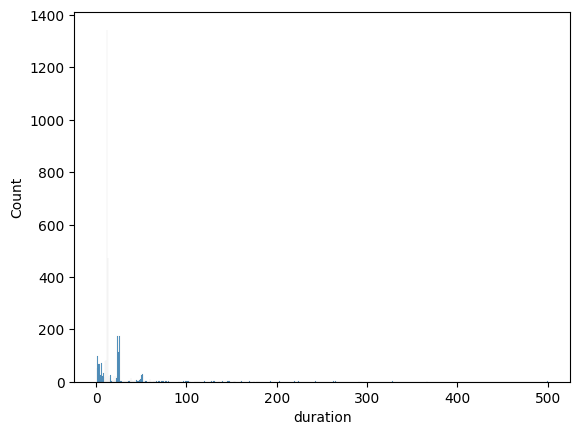

In [33]:
sns.histplot(data=anime_series, x='duration')

From the summary above, it's evident that almost anime series have 12 episodes. Although there're some animes with relatively high episode (100-500), the number of lower episode is much more. Therefore mean and standard deviation don't skew too much.

### 3.2 Anime movie/ova

In [ ]:
data[data['type'] == 'Anime lẻ']['duration'].value_counts()

24 phút        64
23 phút        51
1 tập          35
25 phút        29
100 phút       28
2 tập          27
90 phút        26
95 phút        24
30 phút        22
26 phút        21
98 phút        20
110 phút       18
27 phút        16
93 phút        15
3 tập          15
105 phút       15
102 phút       15
28 phút        14
chưa rõ        14
99 phút        13
106 phút       13
94 phút        13
10 phút        12
89 phút        11
92 phút        11
80 phút        11
115 phút       11
59 phút        11
120 phút       11
87 phút        10
48 phút        10
97 phút        10
108 phút       10
11 phút         9
117 phút        9
70 phút         9
91 phút         9
96 phút         9
71 phút         9
103 phút        9
101 phút        9
111 phút        8
114 phút        8
55 phút         8
109 phút        8
104 phút        8
16 phút         7
116 phút        7
21 phút         7
52 phút         7
50 phút         7
119 phút        7
107 phút        6
6 tập           6
49 phút         6
45 phút   

Anime movies/OVAs are also mixed between episodes and duration time. I will separate them for the purpose of examining the distribution of duration time for each individual movie. Although they fall under the category of single-anime, anime movies can have multiple episodes. These episodes might not necessarily be part of the main storyline, they could be related to character side stories, for example.

In [34]:
anime_movie = data[(data['type'] == 'Anime lẻ') & (data['duration'].str.contains('phút'))].copy()
anime_movie['duration'] = anime_movie['duration'].str.replace(' phút','').astype(float)

In [35]:
show_summary(anime_movie['duration'])

Mean:  66.25503642039543
Median:  73.0
Mode:  24.0
Standard deviation:  37.79792117332266
Quartile range: Q1: 25.0    Q2: 73.0    Q3: 100.0


<Axes: xlabel='duration', ylabel='Count'>

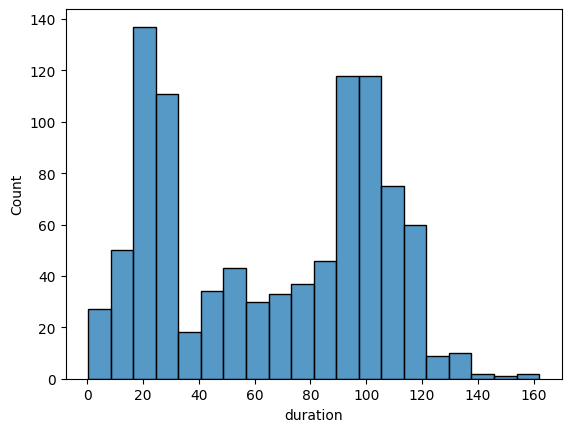

In [36]:
sns.histplot(data=anime_movie, x='duration', bins=20)

Duration histogram of anime movie/ova has 2 peaks. It's mean that there're 2 popular duration in this type of anime (about 15-30 and 90-110). Data doesn't disper too much.

# 4. Exploring categorical data

There're 6 categorical features in this dataset: status, country, quality, rating, season, type.

In [51]:
def show_barplot(feature):
    feature_count = feature.value_counts()

    sns.barplot(x=feature_count.index, y=feature_count.values)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    for i, value in enumerate(feature_count.values):
        plt.annotate(value, (i, value), ha='center', va='bottom')

    plt.show()

In [54]:
def show_piechart(feature):
    feature_count = feature.value_counts()
    sns.set()

    plt.figure(figsize=(5, 5))
    plt.pie(feature_count.values, labels=feature_count.index, autopct='%1.1f%%', startangle=140)

    plt.axis('equal')

    plt.show()

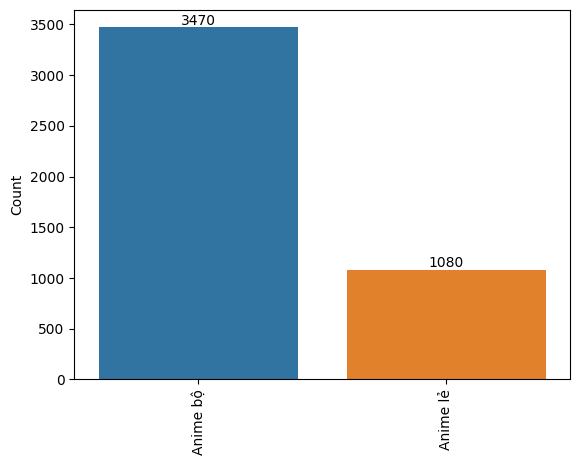

In [52]:
show_barplot(data['type'])

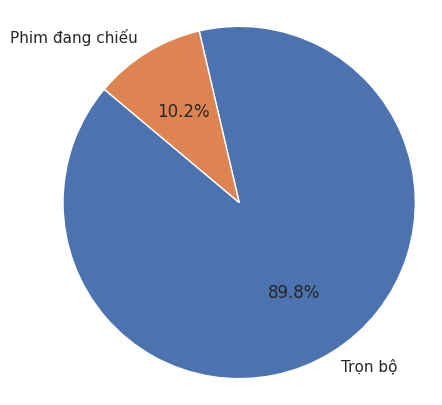

In [55]:
show_piechart(data['status'])

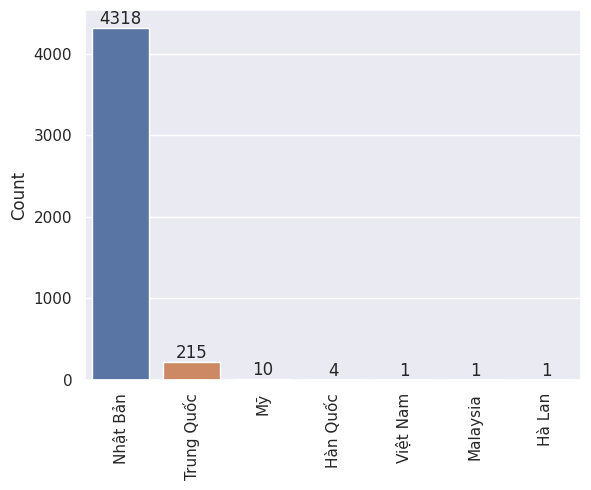

In [56]:
show_barplot(data['country'])

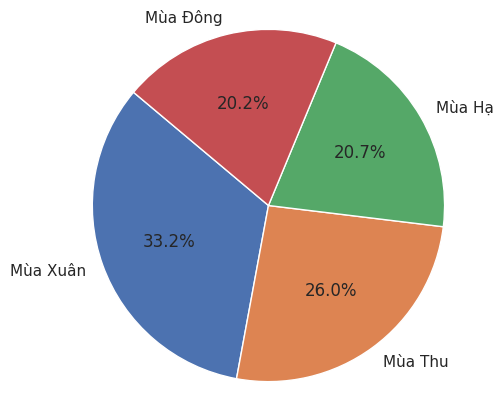

In [57]:
show_piechart(data['season'])

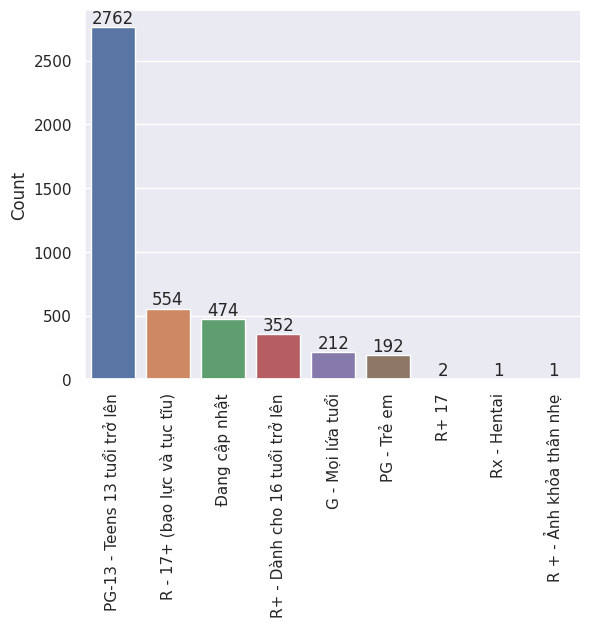

In [59]:
show_barplot(data['rating'])

In [60]:
data['quality'].value_counts()

HD                3888
BD                 277
SD                 205
FHD                116
BD/Bluray           33
HQ                  22
Full HD              2
None                 1
Bluray Disc          1
rHD                  1
CAM HD               1
BD Vietsub           1
OVA BD Vietsub       1
480P                 1
Name: quality, dtype: int64

I will change some values to classify them correctly.

In [65]:
data['quality'] = data['quality'].str.replace('Full HD', 'HD')
data['quality'] = data['quality'].str.replace('BD Vietsub', 'BD')
data['quality'] = data['quality'].str.replace('OVA BD Vietsub', 'BD')
data['quality'] = data['quality'].str.replace('OVA BD', 'BD')

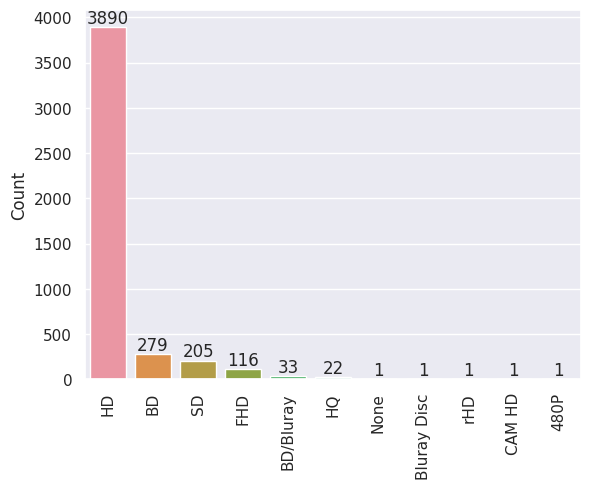

In [66]:
show_barplot(data['quality'])

In [69]:
contingency_table = pd.crosstab(data['season'], data['country'])
print(contingency_table)

country   Hà Lan  Hàn Quốc  Malaysia  Mỹ  Nhật Bản  Trung Quốc  Việt Nam
season                                                                  
Mùa Hạ         0         0         1   0       903          35         1
Mùa Thu        0         1         0   2      1135          44         0
Mùa Xuân       1         2         0   4      1396         108         0
Mùa Đông       0         1         0   4       884          28         0


# 5. Exploring the number of anime through years

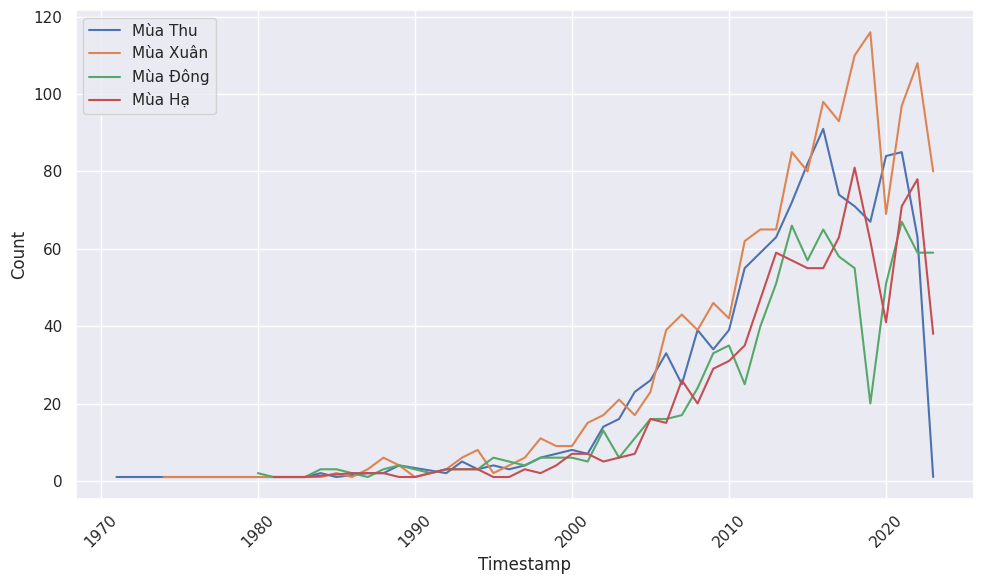

In [79]:
count_data = data.groupby(['year', 'season']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Count', hue='season', data=count_data)

plt.xlabel("Timestamp")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()

plt.show()